Este Proyecto esta basado en el Libro: Aprende Machine Learning. Donde practicaremos lo aprendido a regresión logísticas

Cargamos nuestras librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

Cargamos nuestro dataset

In [3]:
df = pd.read_csv('usuarios_win_mac_lin.csv')
df.head(3)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2


In [4]:
df.shape

(170, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [6]:
df.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [7]:
df.isnull().sum()

duracion    0
paginas     0
acciones    0
valor       0
clase       0
dtype: int64

In [8]:
df.nunique()

duracion    87
paginas      8
acciones    26
valor       43
clase        3
dtype: int64

In [9]:
df.groupby('clase').size()

clase
0    86
1    40
2    44
dtype: int64

Visualizamos los datos

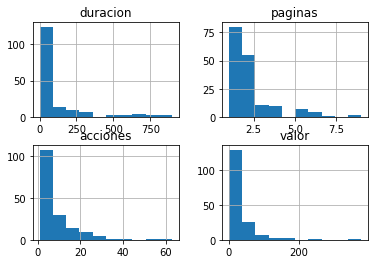

In [10]:
df.drop(['clase'],1).hist()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


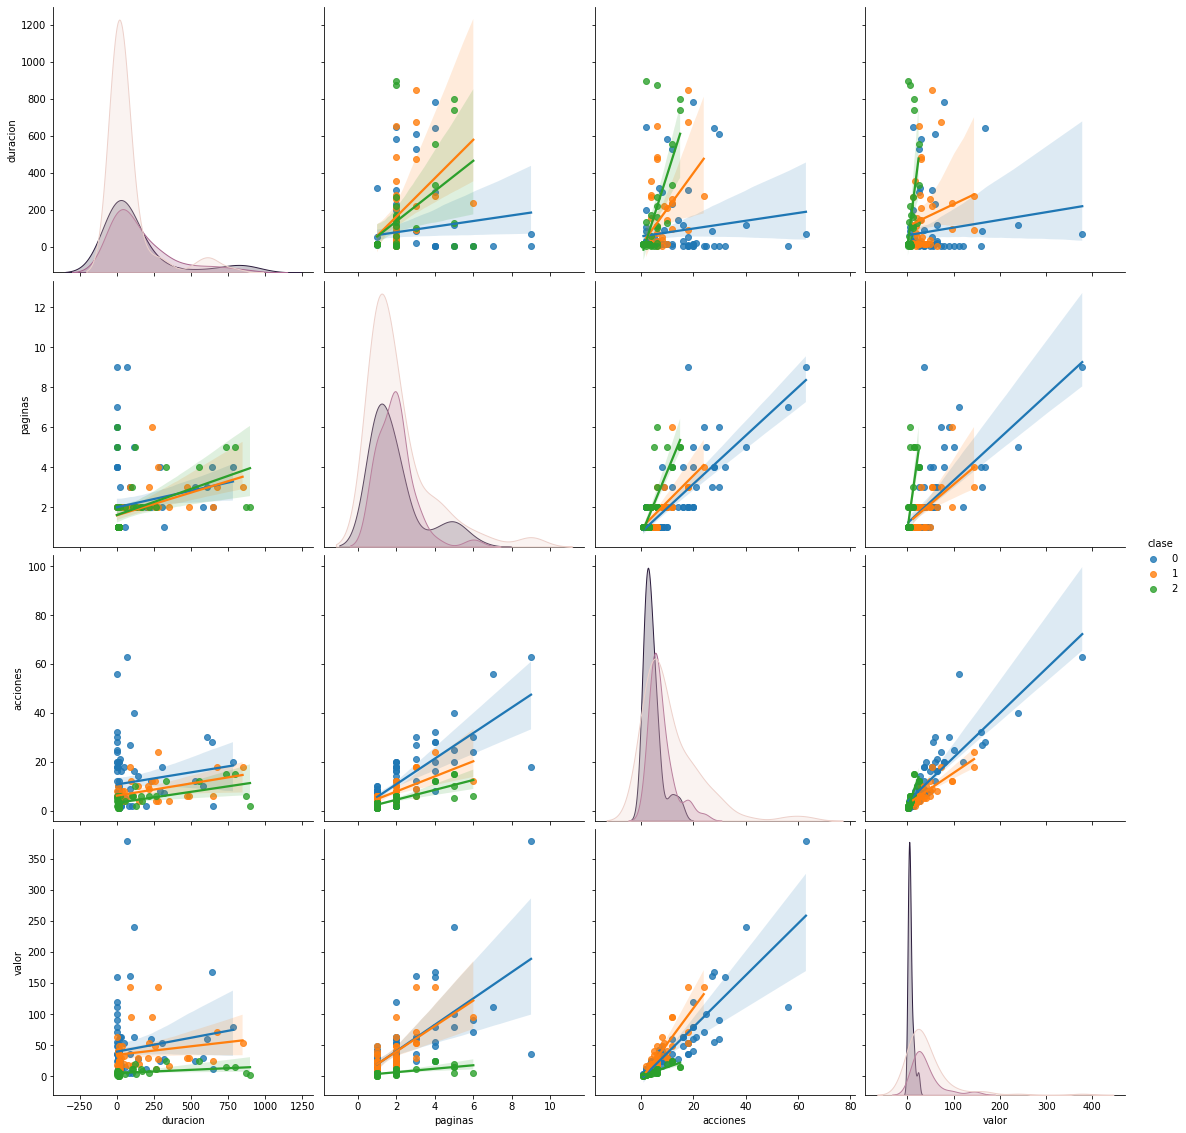

In [11]:
sns.pairplot(df.dropna(), hue='clase', size=4, vars=['duracion','paginas','acciones','valor'], kind = 'reg' )

Creamos el modelo

In [13]:
X = np.array(df.drop(['clase'],1))
y = np.array(df['clase'])
X.shape

(170, 4)

In [14]:
model = linear_model.LogisticRegression()
model.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
predictions = model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


In [16]:
model.score(X,y)

0.7823529411764706